In [5]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import math
import random
from typing import Callable, List
from tqdm.notebook import tqdm

In [6]:
def brute(func, limits, eps):
    a, b = limits
    n = int((b - a) / eps)
    iteration = 0
    evaluation = 0

    min_y = float("inf")
    min_x = 0
    
    for k in range(n+1):
        iteration += 1 # iter up
        x = a + k * (b - a) / n
        evaluation += 1
        y = func( x ) # eval up
        
        if y < min_y:
            min_y = y
            min_x = x
        
    return min_x, min_y, iteration, evaluation


def golden(func, limits, eps):
    a, b = limits
    
    flag = 0
    
    iteration = 0
    evaluation = 0
    
    while abs(a - b) >= eps:
        iteration += 1
        
        delta = (3 - math.sqrt(5)) * (b - a) / 2
        
        if flag == 0:
            evaluation += 2
            x1, x2 = a + delta, b - delta
            f1, f2 = func( x1 ), func( x2 )
        if flag == "x2=x1":
            evaluation += 1
            x1, x2 = a + delta, x1
            f1, f2 = func( x1 ), f1
        if flag == "x1=x2":
            evaluation += 1
            x1, x2 = x2, b - delta
            f1, f2 = f2, func( x2 )

        if f1 <= f2:
            b = x2
            flag = 'x2=x1'
        else:
            a = x1
            flag = 'x1=x2'
           
    min_x = (a + b) / 2
    min_y = (f1 + f2)  / 2
    
    return min_x, min_y, iteration, evaluation


def brute_2d(func, limits, eps):
    ab1, ab2 = limits
    
    a1, b1 = ab1
    n1 = int((b1 - a1) / eps)  
    
    a2, b2 = ab2
    n2 = int((b2 - a2) / eps)
    
    min_y = float("inf")
    min_x = 0
    
    for k1 in tqdm(range(n1 + 1)):
        x1 = a1 + k1 * (b1 - a1) / n1
        for k2 in range(n2 + 1):
            x2 = a2 + k2 * (b2 - a2) / n2
            
            y = func((x1, x2))
            if y < min_y:
                min_y = y
                min_x = (x1, x2)
    return min_x, min_y


def dichotomy(func, limits, eps):
    a, b = limits
    delta = eps / 2
    
    iteration = 0
    evaluation = 0

    while abs(a - b) >= eps:
        
        iteration += 1
        evaluation += 2
        
        median = (a + b) / 2
        x1, x2 = median - delta / 2, median + delta / 2
        
        f1, f2 = func( x1 ), func( x2 )
        
        if f1 <= f2:
            b = x2
        else:
            a = x1
           
    min_x = (a + b) / 2
    min_y = (f1 + f2) / 2
        
    return min_x, min_y, iteration, evaluation


# Task 1

In [7]:
def f1(x):
    return np.power(x, 3)

def f2(x):
    return np.abs(x - 0.2)

def f3(x):
    return x * np.sin(1 / x)

In [8]:
eps = 0.001

br = brute(f3, (0.01, 1), eps)
br

(0.223, -0.21722461258083445, 991, 991)

In [9]:
eps = 0.001

br = dichotomy(f3, (0.01, 1), eps)
br

(0.22259631347656245, -0.21722919262931228, 11, 22)

In [10]:
eps = 0.001

br = golden(f2, (0.01, 1), eps)
br

(0.20002326803792433, 0.0002010183696991713, 15, 16)

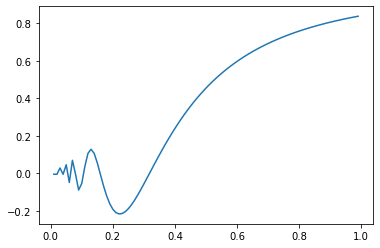

In [11]:
x = np.arange(0.01, 1, 0.01)
plt.plot(x, f3(x))
#plt.plot(len(x) * [0])

# Task 2

In [43]:
random.seed(999)
a, b = random.random(), random.random()

max_x = 100

x = np.array([k / 100 for k in np.arange(0, max_x + 1, 1)])
y = np.array([a * x[k] + b + random.uniform(0, 1) for k in range(len(x))])

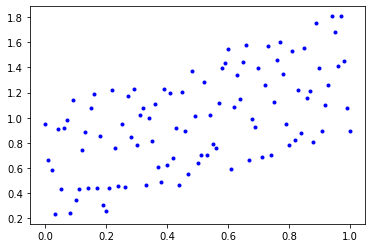

In [44]:
plt.plot(x, y, '.b')
#plt.xlim(-0.5, 1.5)
#plt.ylim(-0.5, 3)

In [16]:
def f_linear(x, a, b):
    return a * x + b

def f_rational(x, a, b):
    return a / ( 1 + b * x )

def least_squares(ab):
    a, b = ab
    global x, y
    global func
    return np.sum( (func(x, a, b) - y)**2) / x.shape[0]

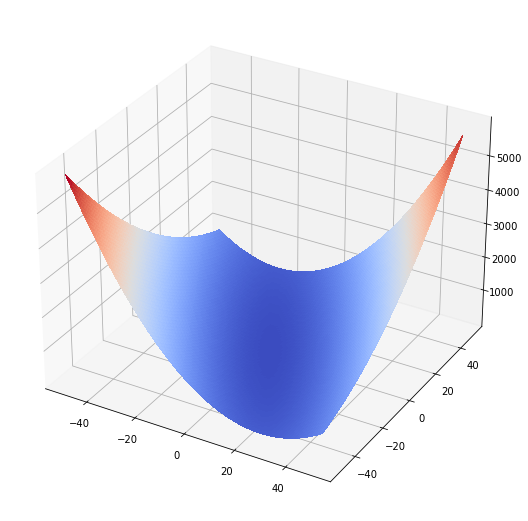

In [17]:
from matplotlib import cm
from sklearn.linear_model import LinearRegression

func = f_linear

X = np.linspace(-50, 50, 100)
Y = np.linspace(-50, 50, 100)

Z = np.ones((X.shape[0], Y.shape[0]))
for i in range(X.shape[0]):
    for j in range(Y.shape[0]):
        Z[i, j] = least_squares([X[i], Y[j]])

X, Y = np.meshgrid(X, Y)
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [18]:
ab_init = [1, 1]
func = f_linear
opt_lin_1 = optimize.minimize(least_squares, ab_init, method='nelder-mead', options={'xatol': 1e-3, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.095523
         Iterations: 33
         Function evaluations: 66


In [19]:
opt_lin_2 = brute_2d(least_squares, limits=((-10, 10), (-10, 10)), eps=0.01)

  0%|          | 0/2001 [00:00<?, ?it/s]

In [20]:
opt_lin_3 = optimize.fmin_powell(least_squares, (1, 1))

Optimization terminated successfully.
         Current function value: 0.095523
         Iterations: 3
         Function evaluations: 100


In [21]:
print(opt_lin_3, opt_lin_2[0], opt_lin_1.x)

[0.75845932 0.59963353] (0.7599999999999998, 0.5999999999999996) [0.75858766 0.5997573 ]


In [22]:
ab_init = [1, 1]
func = f_rational
opt_rat_1 = optimize.minimize(least_squares, ab_init, method='nelder-mead', options={'xatol': 1e-3, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.096753
         Iterations: 38
         Function evaluations: 70


In [23]:
opt_rat_2 = brute_2d(least_squares, limits=((-10, 10), (-10, 10)), eps=0.01)

  0%|          | 0/2001 [00:00<?, ?it/s]

<ipython-input-16-b656d7e367bd>:5: RuntimeWarning: divide by zero encountered in true_divide
  return a / ( 1 + b * x )
<ipython-input-16-b656d7e367bd>:5: RuntimeWarning: invalid value encountered in true_divide
  return a / ( 1 + b * x )


In [24]:
opt_rat_3 = optimize.fmin_powell(least_squares, (1, 1))

Optimization terminated successfully.
         Current function value: 0.096753
         Iterations: 5
         Function evaluations: 145


In [25]:
print(opt_rat_3, opt_rat_2[0], opt_rat_1.x)

[ 0.69442789 -0.51922524] (0.6899999999999995, -0.5199999999999996) [ 0.69427227 -0.51968641]


In [34]:
random.seed(999)
a, b = random.random(), random.random()

max_x = 100

x = np.array([k / 100 for k in np.arange(0, max_x + 1, 1)])
y = np.array([a * x[k] + b for k in range(len(x))])

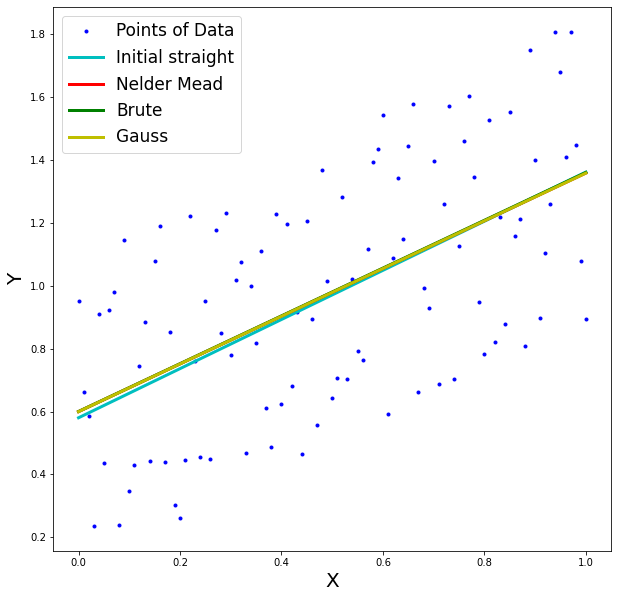

In [60]:
plt.figure(figsize=(10,10))
plt.plot(x, y, '.b', label="Points of Data")
plt.xlabel("X", fontsize=20)
plt.ylabel("Y", fontsize=20)
plt.plot(x, a * x + b + 0.5, 'c', label="Initial straight", linewidth=3)
plt.plot(x, f_linear(x, opt_lin_1.x[0], opt_lin_1.x[1]), 'r', label="Nelder Mead", linewidth=3)
plt.plot(x, f_linear(x, opt_lin_2[0][0], opt_lin_2[0][1]), 'g', label="Brute", linewidth=3)
plt.plot(x, f_linear(x, opt_lin_3[0], opt_lin_3[1]), 'y', label="Gauss", linewidth=3)
plt.legend(fontsize=17)

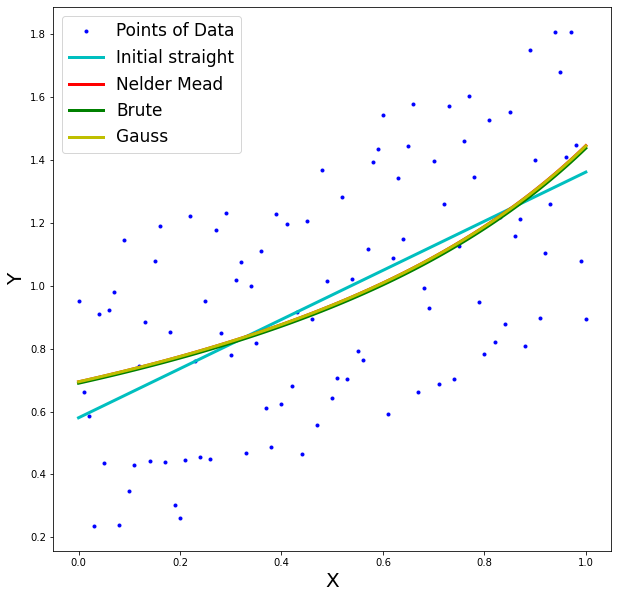

In [61]:
plt.figure(figsize=(10,10))
plt.plot(x, y, '.b', label="Points of Data")
plt.xlabel("X", fontsize=20)
plt.ylabel("Y", fontsize=20)
plt.plot(x, a * x + b + 0.5, 'c', label="Initial straight", linewidth=3)
plt.plot(x, f_rational(x, opt_rat_1.x[0], opt_rat_1.x[1]), 'r', label="Nelder Mead", linewidth=3)
plt.plot(x, f_rational(x, opt_rat_2[0][0], opt_rat_2[0][1]), 'g', label="Brute", linewidth=3)
plt.plot(x, f_rational(x, opt_rat_3[0], opt_rat_3[1]), 'y', label="Gauss", linewidth=3)
plt.legend(fontsize=17)